### NGS Data Analysis: Part_2

**Alignment Commands:** Genome Indexing 

In [ ]:
$ cd Day2
$ ls
$ bwa index Reference_Fasta/hg19_chr8.fa
$ cd Reference_Fasta/

**Alignmen for Father**

In [ ]:
$ bwa mem -R "@RG\tID:Sid\tSM:Father\tLB:library1\tPU:flowcell\tPL:Illumina" -M -t 15
Reference_Fasta/hg19_chr8.fa FastQfiles/father_R1.fq.gz FastQfiles/father_R2.fq.gz | samtools
sort -o BamFiles/father.bam

After running the above command screen will look like

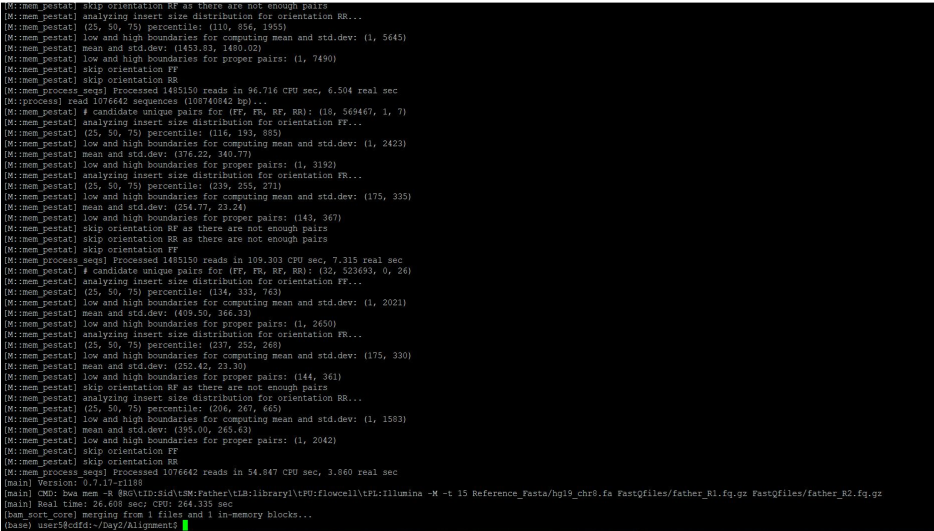

In [ ]:
$ cd BamFiles
$ cd ..
$ samtools index BamFiles/father.bam

**Alignment for Mother** 

In [ ]:
$ bwa mem -R "@RG\tID:Sid\tSM:Mother\tLB:library1\tPU:flowcell\tPL:Illumina" -M -t 15
Reference_Fasta/hg19_chr8.fa FastQfiles/mother_R1.fq.gz FastQfiles/mother_R2.fq.gz | samtools
sort -o BamFiles/mother.bam
.
.
.
$samtools index BamFiles/mother.bam

**Alignment for Proband**

In [ ]:
$ bwa mem -R "@RG\tID:Sid\tSM:Proband\tLB:library1\tPU:flowcell\tPL:Illumina" -M -t 15
Reference_Fasta/hg19_chr8.fa FastQfiles/proband_R1.fq.gz FastQfiles/proband_R2.fq.gz | samtools
sort -o BamFiles/proband.bam
.
.
.
$ samtools index BamFiles/proband.bam

### Checking All Outputs

In [ ]:
$ cd BamFiles
$ ls

### Marking The Duplicates

In [ ]:
$ mkdir -p DupMarkedBamFiles
$ mkdir -p Duplicate_metrics
$ ls

**MarkDuplicate-Father**

In [ ]:
$ picard MarkDuplicates ASSUME_SORTED=true I=BamFiles/father.bam
O=DupMarkedBamFiles/father_dupmarked.bam M=Duplicate_metrics/father_duplicate_metrics.txt CREATE_INDEX=true

Command is look like this: 
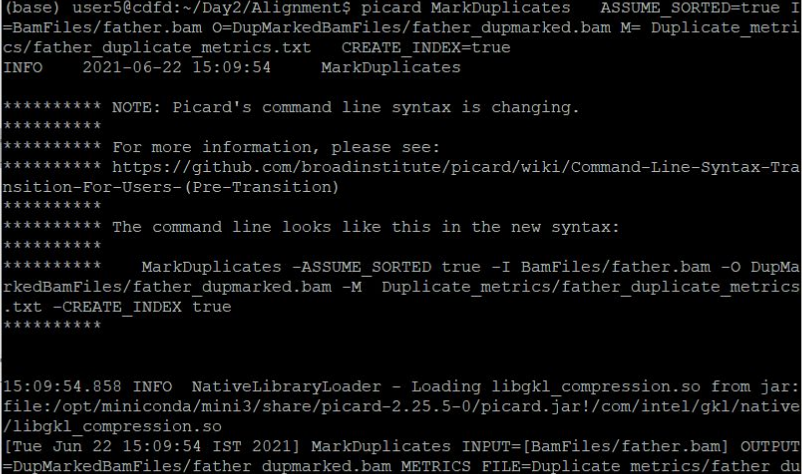

**MarkDuplicate-Mother**

In [ ]:
$ picard MarkDuplicates ASSUME_SORTED=true I=BamFiles/mother.bam
O=DupMarkedBamFiles/mother_dupmarked.bam M=Duplicate_metrics/mother_duplicate_metrics.txt CREATE_INDEX=true

**MarkDuplicate-Proband**

In [ ]:
$ picard MarkDuplicates ASSUME_SORTED=true I=BamFiles/proband.bam
O=DupMarkedBamFiles/proband_dupmarked.bam M=Duplicate_metrics/proband_duplicate_metrics.txt CREATE_INDEX=true

### QUALIMAP

In [ ]:
$ mkdir -p QualimapOutput
$ ls

**Qualimap-Father**

In [ ]:
$ qualimap bamqc -bam DupMarkedBamFiles/father_dupmarked.bam -gff
FastQfiles/Target_Region.bed -outdir QualimapOutput/father -outfile father

**Qualimap-Mother**

In [ ]:
$ qualimap bamqc -bam DupMarkedBamFiles/mother_dupmarked.bam -gff
FastQfiles/Target_Region.bed -outdir QualimapOutput/mother-outfile mother

**Qualimap-Proband**

In [ ]:
$ qualimap bamqc -bam DupMarkedBamFiles/proband_dupmarked.bam -gff
FastQfiles/Target_Region.bed -outdir QualimapOutput/proband-outfile proband

### Checking Qualimap Results

In [ ]:
$ cd QualimapOutput
$ ls
$ cd mother
$ ls
$ cd QualimapOutput
$ ls 
$ cd mother/
$ ls
$ less genome_results.txt

Output look like: 
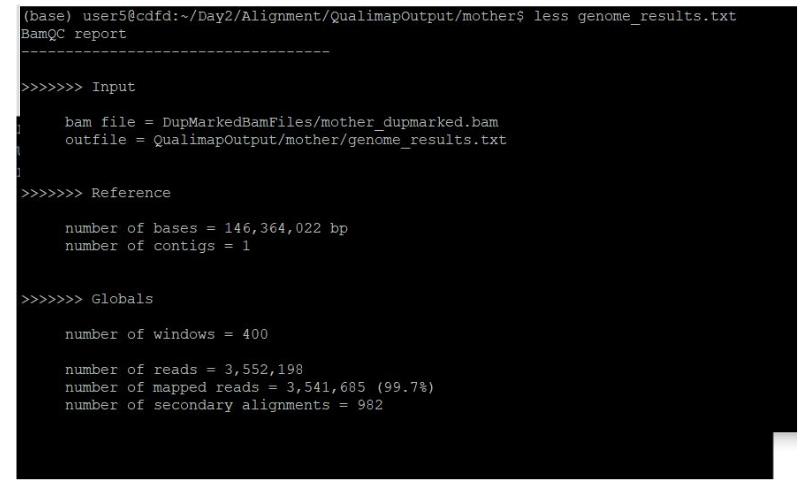

Done | **Thank you**